In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression, RFECV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

import torch
import torch.nn as nn
import torch.optim as optim

In [4]:
df = pd.read_pickle('df_exp1.pkl')

string_features = df.select_dtypes(include=['object']).columns.tolist()
print("String features:", string_features)

String features: ['C Messreihe ', 'F DMS ']


In [9]:
encoder = OrdinalEncoder()

df[string_features] = encoder.fit_transform(df[string_features])
df.shape

(27864, 88)

In [15]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_features, columns=df.columns)

In [20]:
y = df_scaled["N AufgewAmplitudeNom [MPa]"]
X = df_scaled.drop(columns=["N AufgewAmplitudeNom [MPa]"])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

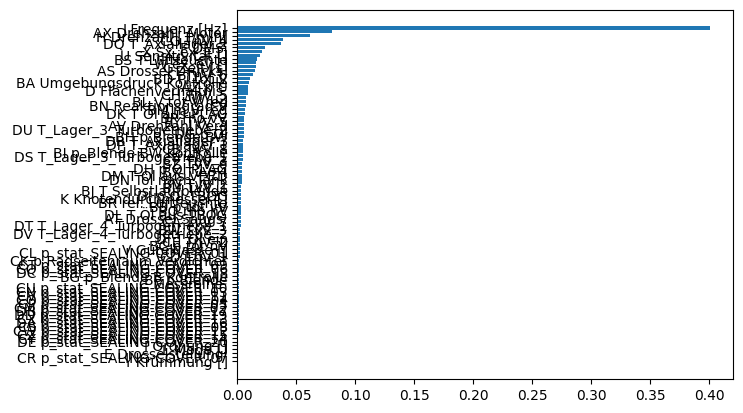

In [34]:
f_i = list(zip(rf.feature_names_in_, rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()


In [36]:
rfe = RFECV(rf,cv=5,scoring="neg_mean_squared_error")

rfe.fit(X_train,y_train)

selected_features = np.array(rf.feature_names_in_)[rfe.get_support()]